In [24]:
# these packages are used in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import geopy.distance as geo
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
%matplotlib inline

Redefining df3 as a new DataFrame for this appendix work.

In [25]:
df3 = pd.read_csv("data/master_data_2.csv")
df3


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,closest_water,group_C,group_E,group_N,group_NE,group_NW,group_S,group_SE,group_SW,group_W
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,...,0.680220,0,0,0,0,0,0,0,0,1
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,...,2.915718,0,0,0,0,1,0,0,0,0
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,...,2.331581,0,0,0,0,1,0,0,0,0
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,NO,...,0.466960,0,0,0,0,0,0,0,0,1
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,...,1.729957,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21054,21415,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,NO,...,5.356536,0,0,0,0,1,0,0,0,0
21055,21416,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,NO,...,1.725096,0,0,0,0,0,0,0,0,1
21056,21417,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,NO,...,0.926910,0,0,0,0,1,0,0,0,0
21057,21418,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,...,2.400465,1,0,0,0,0,0,0,0,0


In [26]:
grade_redux = df3[["price","grade","sqft_living"]]

Created a new DataFrame from df3 called grade_redux to simply hold the data we will be examining.

In our final model, we unfortunately could not utilize grade due to its high multicollinearity with sqft_living. 
We still believe that grade is a major factor in the price of a home, and while the livable area of a home may contribute to its grade, it is more to do with the quality of the materials and craftsmanship. It is also reasonable to assume someone may want to spend more on higher grade home than on more square feet.



We decided to run a statmodel ols linear regression test. Since this is just an appendix item and we not be making any masssive recomedations on this, we decided against a train-test split for this quick metric.

In [27]:
formula = 'price ~ grade'


model2 = ols(formula=formula, data=grade_redux)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.670e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:50:08   Log-Likelihood:            -2.9362e+05
No. Observations:               21059   AIC:                         5.872e+05
Df Residuals:                   21057   BIC:                         5.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.069e+06   1.26e+04    -84.939      0.000   -1.09e+06   -1.04e+06
grade       2.102e+05   1626.119    129.236      0.000    2.07e+05    2.13e+05
==============================================================================
Omnibus:                    19418.526   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1995480.289
Skew:                           4.093   Prob(JB):                         0.00
Kurtosis:                      49.980   Cond. No.                         52.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see this basic untrained model was able to predict 44% of our variation in price. Next we wanted to see our average price, average sqft_living, and average price per sqft_living.

In [28]:
avg_price_by_grade = grade_redux.groupby(['grade']).mean(['price','sqft_living'])
ind = avg_price_by_grade.index
avg_price_by_grade["price_per_sqft_liv"] = avg_price_by_grade['price']/avg_price_by_grade['sqft_living']

avg_price_by_grade


,price,sqft_living,price_per_sqft_liv
grade,,,
3,2.620000e+05,520.000000,503.846154
4,2.120019e+05,680.740741,311.428183
5,2.465284e+05,981.955752,251.058557
6,3.010554e+05,1187.637011,253.491116
7,4.017706e+05,1685.044310,238.433244
8,5.429744e+05,2180.707963,248.989968
9,7.754414e+05,2857.240602,271.395217
10,1.077081e+06,3510.118613,306.850393
11,1.505098e+06,4371.023810,344.335417


We then graphed both of these results below.

In [29]:

ax = sns.barplot(x = ind,  y = avg_price_by_grade["price"])
sns.(rc = {'figure.figsize': (24,18)})
ax.set_xlabel("Grade", fontsize = 20)
ax.set_ylabel(" Home Price", fontsize = 20)
ax.set_title("Average Home Price in Millions Of Dollars for Each Grade", fontsize = 25)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18);
plt.tick_params(axis='both', which='major', labelsize=14)


SyntaxError: invalid syntax (<ipython-input-29-c888344d9f03>, line 2)

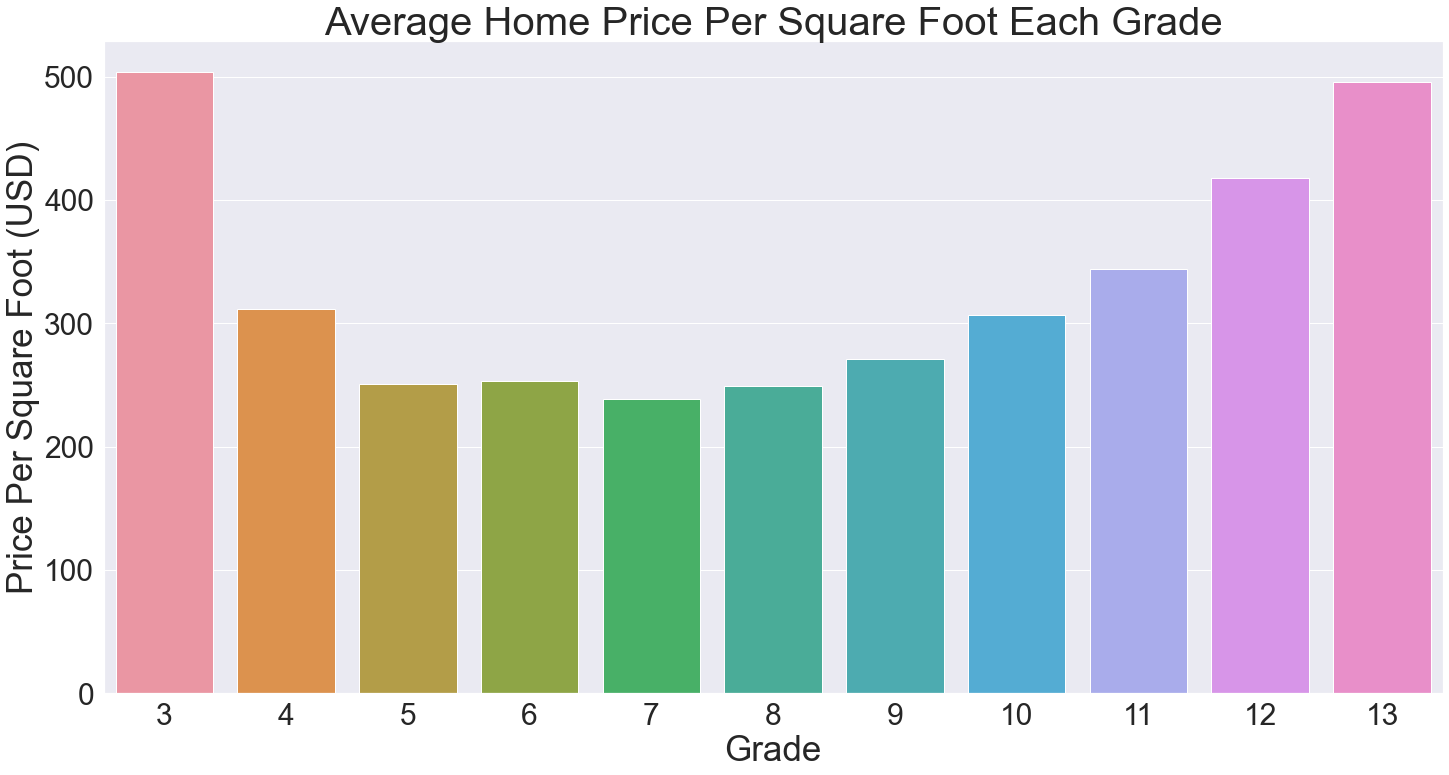

In [51]:
plt.figure (figsize=(24,12))

ax = sns.barplot(x = ind,  y = avg_price_by_grade["price_per_sqft_liv"])
ax.set_xlabel("Grade", fontsize = 35)
ax.set_ylabel("Price Per Square Foot (USD)", fontsize = 35)
ax.set_title("Average Home Price Per Square Foot Each Grade", fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=30)


We then created a new category that is the percent change between each grade. As we had no grade 1 or 2 houses, we could not get the difference in price between them of for grade 3 homes. These results were then graphed as both a bar and line graph.

In [34]:
avg_price_by_grade["percent_change_by_grade"] = avg_price_by_grade["price_per_sqft_liv"].pct_change() * 100

    

In [35]:
avg_price_by_grade

,price,sqft_living,price_per_sqft_liv,percent_change_by_grade
grade,,,,
3,2.620000e+05,520.000000,503.846154,NaN
4,2.120019e+05,680.740741,311.428183,-38.189826
5,2.465284e+05,981.955752,251.058557,-19.384767
6,3.010554e+05,1187.637011,253.491116,0.968921
7,4.017706e+05,1685.044310,238.433244,-5.940197
8,5.429744e+05,2180.707963,248.989968,4.427539
9,7.754414e+05,2857.240602,271.395217,8.998454
10,1.077081e+06,3510.118613,306.850393,13.064039
11,1.505098e+06,4371.023810,344.335417,12.216059


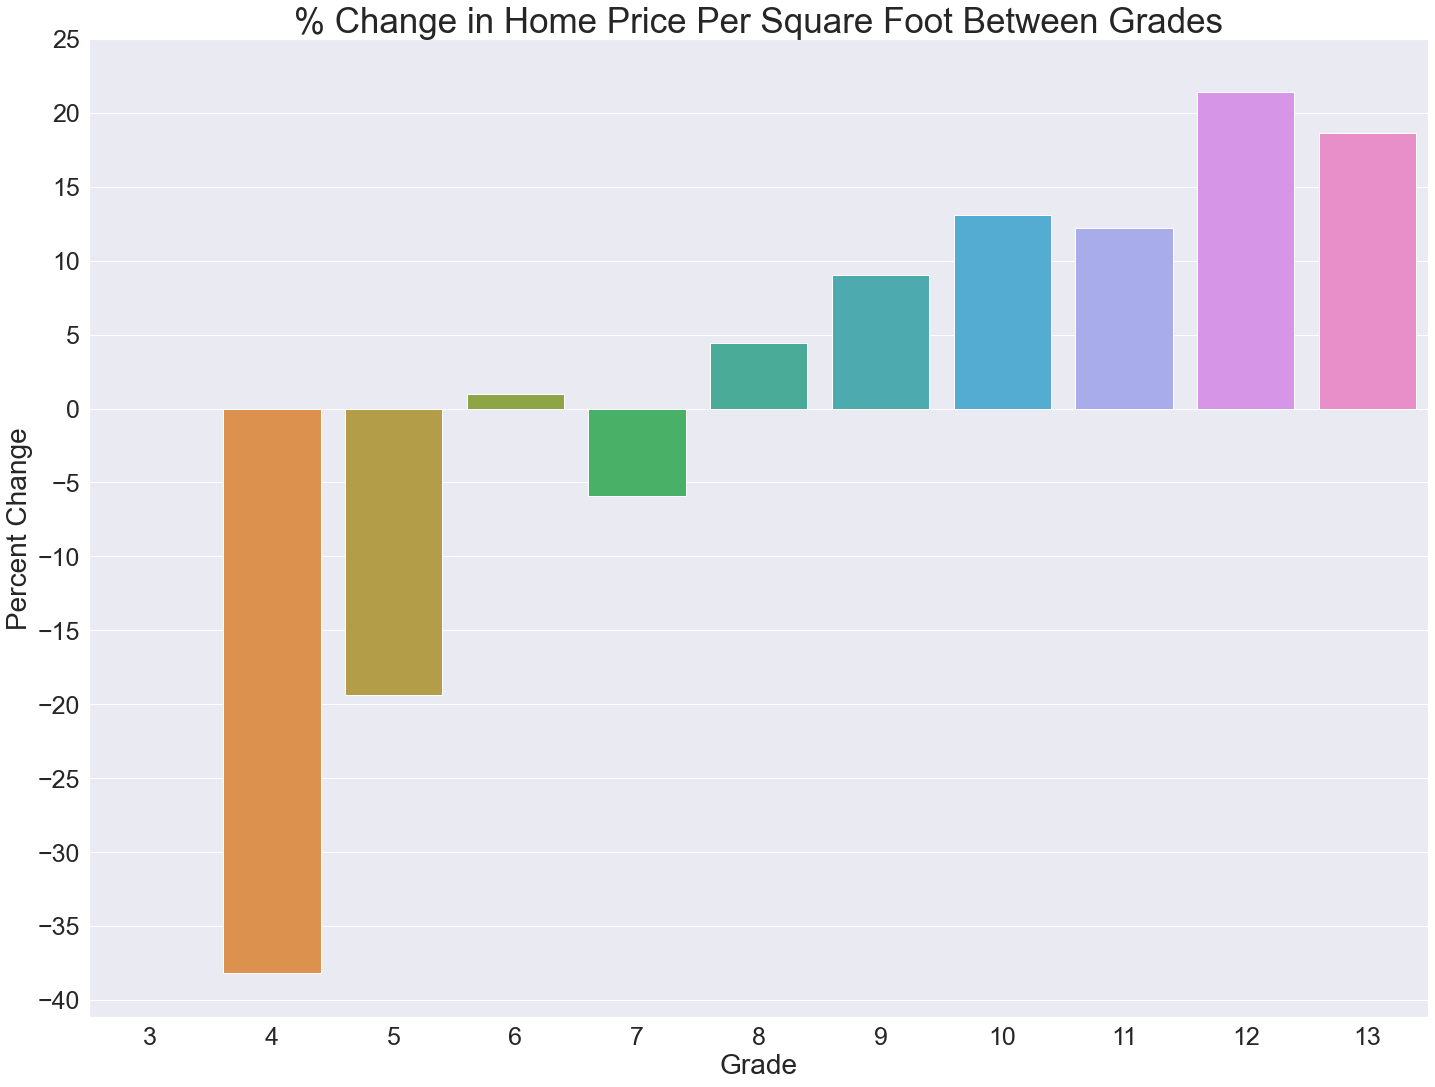

In [52]:
plt.figure (figsize=(24,18))
ax = sns.barplot(x=ind, y = avg_price_by_grade.percent_change_by_grade)
ax.set_xlabel("Grade", fontsize = 28)
ax.set_ylabel("Percent Change", fontsize = 28)
ax.set_title("% Change in Home Price Per Square Foot Between Grades", fontsize = 35)
ax.set_yticks(range(-40,30,5))

plt.tick_params(axis='both', which='major', labelsize=25);


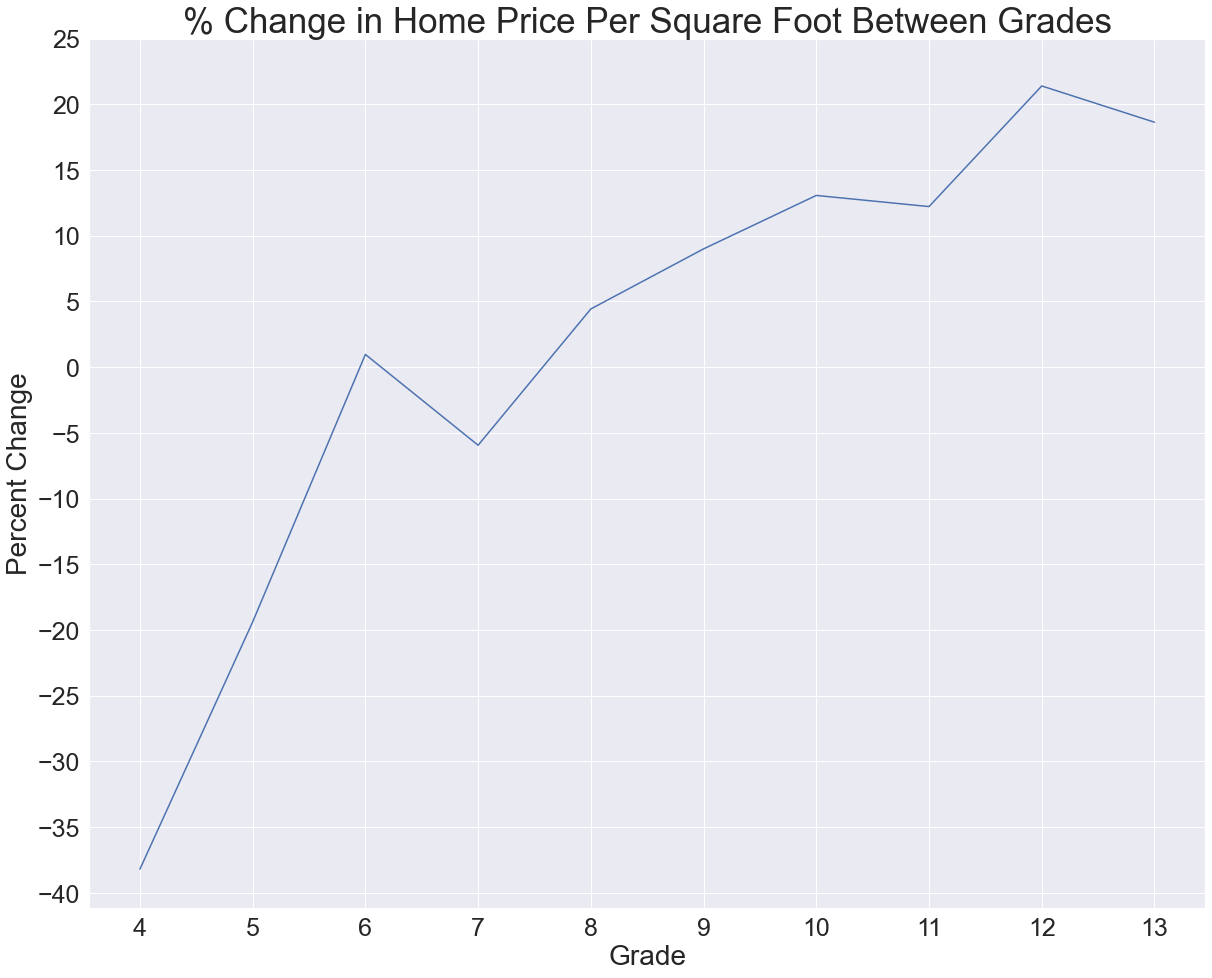

In [64]:
plt.figure (figsize=(20,16))
ax = sns.lineplot(x=ind, y = avg_price_by_grade.percent_change_by_grade)
ax.set_xlabel("Grade", fontsize = 28)
ax.set_ylabel("Percent Change", fontsize = 28)
ax.set_title("% Change in Home Price Per Square Foot Between Grades", fontsize = 35)
ax.set_yticks(range(-40,30,5))
ax.set_xticks(range(4,14,1))
plt.tick_params(axis='both', which='major', labelsize=25)


As you can see, it would be best practice to begin with a grade 7 house and rennovate it until it is a grade 8 or higher as there are massive possible profit gains.


In [55]:
df4 = pd.read_csv('data/kc_house_data.csv')
df4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [58]:
df4[[(df4.id.value_counts() == 2) | (df4.id.value_counts() == 3)]]

ValueError: Item wrong length 1 instead of 21597.

In [59]:
duplicates = df4[df4['id'].map(df4['id'].value_counts()) >= 2]
duplicates.to_csv('data/all_duplicates.csv')

In [61]:
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [60]:
duplicates2 = df4[df4['id'].map(df4['id'].value_counts()) >= 3]
duplicates2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250
